## CHAPTER 3

## Sử dụng hàm cơ sở hằng số để xấp xỉ hàm Gaussian trên 1 lưới R^2 (NEAREST-NEIGHBOR INTERPOLATION)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### Hàm gốc (Gaus)

In [2]:
def f(x, y):
    return np.exp(-x**2 - y**2)

#### Hàm cơ sở hằng số Phi0 (hàm nội suy)
##### Hàm này định nghĩa hàm cơ sở hằng số, nhận vào tọa độ x,y và một tập hợp các điểm biên của ô ci. Hàm trả về 1 nếu x,y nằm trong ô ci, ngược lại trả về 0.

In [3]:
def constant_basis_function(x, y, ci):
    min_x, max_x = min(ci, key=lambda p: p[0])[0], max(ci, key=lambda p: p[0])[0]
    min_y, max_y = min(ci, key=lambda p: p[1])[1], max(ci, key=lambda p: p[1])[1]
    
    return 1 if min_x <= x <= max_x and min_y <= y <= max_y else 0

#### Tạo dữ liệu mẫu

In [4]:
X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z_sample = f(X, Y)

#### Tạo lưới

In [5]:
grid_centers_x = np.arange(-3, 3, 0.25)
grid_centers_y = np.arange(-3, 3, 0.25)

#### Xấp xỉ hàm f bằng cách sử dụng hàm cơ sở hằng số

In [6]:
Z_approximated = np.zeros_like(Z_sample)
for center_x in grid_centers_x: # Lặp qua Các Điểm Trung Tâm của Ô Lưới
    for center_y in grid_centers_y: # NT
        basis_function_values = np.array([[constant_basis_function(x, y, [(center_x-0.5, center_y-0.5), (center_x-0.5, center_y+0.5), (center_x+0.5, center_y+0.5), (center_x+0.5, center_y-0.5)]) for x, y in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])
        Z_approximated += f(center_x, center_y) * basis_function_values



#### Vẽ đồ thị

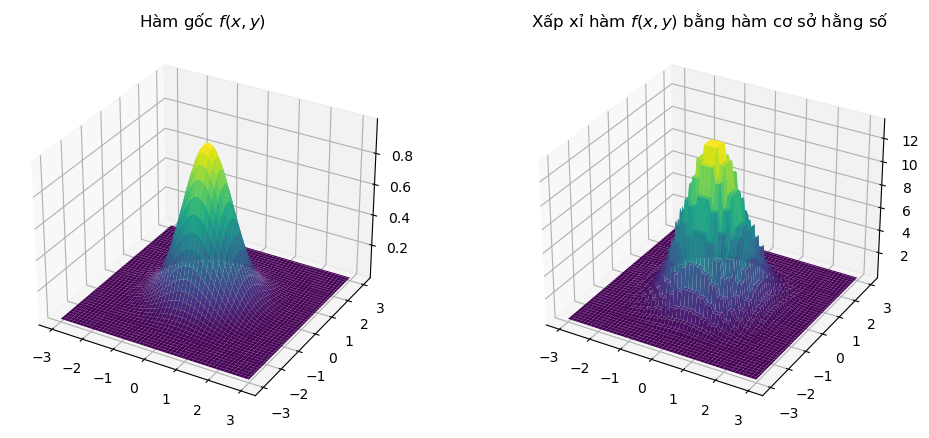

In [7]:

fig = plt.figure(figsize=(12, 5))

# Đồ thị hàm gốc
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z_sample, cmap='viridis')
ax1.set_title('Hàm gốc $f(x, y)$')

# Đồ thị xấp xỉ bằng hàm cơ sở hằng số
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z_approximated, cmap='viridis')
ax2.set_title('Xấp xỉ hàm $f(x, y)$ bằng hàm cơ sở hằng số')

plt.show()


## Hàm cơ sở tuyến tính

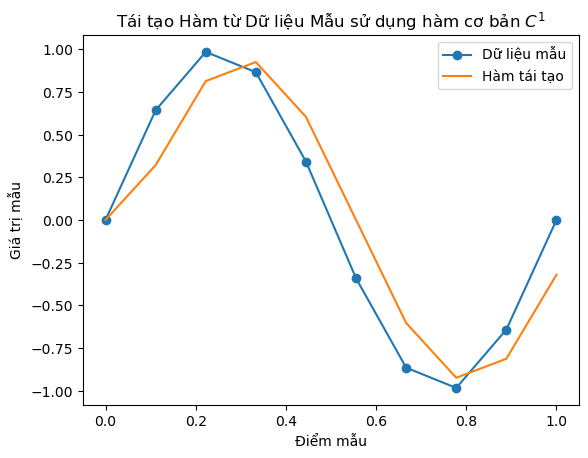

In [8]:
# Hàm C^1
def C1_function(x, xi, xi1):
    return max(0, 1 - abs((x - (xi + xi1) / 2) / (xi1 - xi)))

# Tái tạo hàm liên tục từ dữ liệu mẫu
def reconstruct_function(samples, global_basis):
    num_samples = len(samples)
    num_cells = num_samples - 1
    reconstructed_function = np.zeros_like(samples)

    for i in range(num_cells):
        xi, xi1 = i, i + 1
        for j in range(num_samples):
            reconstructed_function[j] += samples[i] * global_basis(j, xi, xi1)

    return reconstructed_function

# Tạo dữ liệu mẫu
num_samples = 10
sample_points = np.linspace(0, 1, num_samples)
sample_values = np.sin(2 * np.pi * sample_points)

# Tái tạo hàm từ dữ liệu mẫu
reconstructed_function = reconstruct_function(sample_values, C1_function)

# Hiển thị kết quả
plt.plot(sample_points, sample_values, 'o-', label='Dữ liệu mẫu')
plt.plot(sample_points, reconstructed_function, label='Hàm tái tạo')
plt.legend()
plt.xlabel('Điểm mẫu')
plt.ylabel('Giá trị mẫu')
plt.title('Tái tạo Hàm từ Dữ liệu Mẫu sử dụng hàm cơ bản $C^1$')
plt.show()


###  Tái tạo hàm liên tục từ dữ liệu mẫu trên lưới (sử dụng hàm nội suy có sẵn)

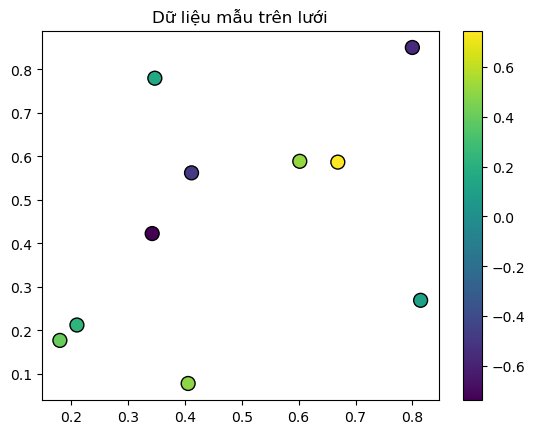

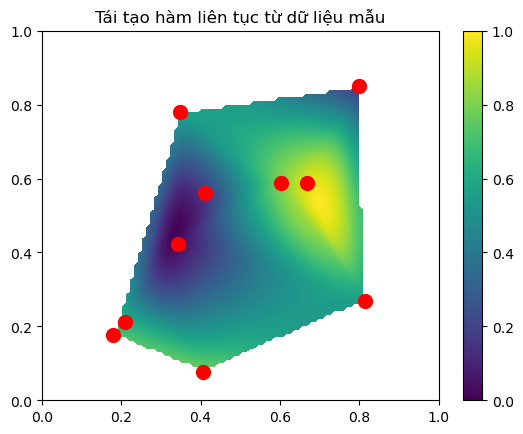

In [9]:
from scipy.interpolate import griddata

# Tạo dữ liệu mẫu
x_sample = np.random.rand(10)
y_sample = np.random.rand(10)
z_sample = np.sin(2 * np.pi * x_sample) * np.cos(2 * np.pi * y_sample)

# Tạo lưới
x_grid, y_grid = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))

# Tái tạo hàm liên tục từ dữ liệu mẫu
z_grid = griddata((x_sample, y_sample), z_sample, (x_grid, y_grid), method='cubic')

# Hiển thị dữ liệu mẫu
plt.scatter(x_sample, y_sample, c=z_sample, cmap='viridis', edgecolors='k', marker='o', s=100)
plt.title('Dữ liệu mẫu trên lưới')
plt.colorbar()
plt.show()

# Hiển thị hàm liên tục tái tạo
plt.contourf(x_grid, y_grid, z_grid, cmap='viridis', levels=100)
plt.scatter(x_sample, y_sample, c='r', marker='o', s=100)
plt.title('Tái tạo hàm liên tục từ dữ liệu mẫu')
plt.colorbar()
plt.show()


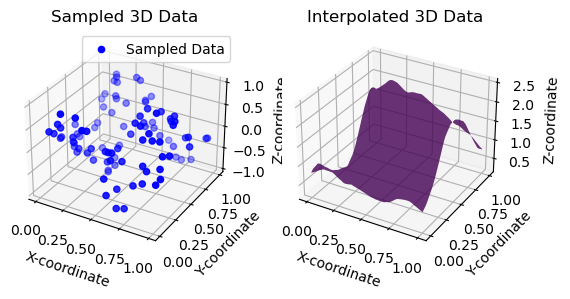

In [10]:
# Tạo dữ liệu mẫu
np.random.seed(42)
num_samples = 100
x_samples = np.random.rand(num_samples)
y_samples = np.random.rand(num_samples)
z_samples = np.sin(2 * np.pi * x_samples) * np.cos(2 * np.pi * y_samples)  # Dữ liệu mẫu là hàm sin(x)*cos(y)

# Tạo lưới mẫu
grid_x, grid_y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))

# Hàm nội suy tuyến tính
def linear_interpolation(x, y, x_samples, y_samples, values):
    n = len(x_samples)
    result = np.zeros_like(x)
    
    for i in range(n):
        result += values[i] * (1 - np.abs(x - x_samples[i])) * (1 - np.abs(y - y_samples[i]))
    
    return result

# Nội suy và tái tạo dữ liệu
z_grid = linear_interpolation(grid_x, grid_y, x_samples, y_samples, z_samples)

# Hiển thị dữ liệu mẫu và dữ liệu tái tạo trong biểu đồ 3D
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.scatter(x_samples, y_samples, z_samples, c='b', marker='o', label='Sampled Data')
ax.set_title('Sampled 3D Data')
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.set_zlabel('Z-coordinate')
ax.legend()

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(grid_x, grid_y, z_grid, cmap='viridis', alpha=0.8, rstride=100, cstride=100)
ax.set_title('Interpolated 3D Data')
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.set_zlabel('Z-coordinate')

plt.show()


### Biến đổi tọa độ không gian thực sang không gian tham chiếu 

### LINE CELL

In [11]:
# Hàm T^-1
def inverse_transform(p, p1, p2):
    return np.linalg.norm(p - p1) / np.linalg.norm(p2 - p1)

# Tọa độ của điểm P trong không gian thực
P = np.array([10.0])

# Đỉnh của cell đoạn thẳng trong không gian thực
v1 = np.array([0.0])
v2 = np.array([10.0])

# Biến đổi ngược lại
r = inverse_transform(P, v1, v2)

# Hiển thị kết quả
print(f"Tọa độ của P trong không gian tham chiếu: ({r})")


Tọa độ của P trong không gian tham chiếu: (1.0)


### TRIANGLE CELL

In [12]:
def norm(vector):
    return np.sqrt(np.sum(vector**2))

# Hàm T^-1
def inverse_transform(p, p1, p2, p3):
    return (norm(np.cross(p - p1, p3 - p1)) / norm(np.cross(p2 - p1, p3 - p1))), (norm(np.cross(p - p1, p2 - p1)) / norm(np.cross(p3 - p1, p2 - p1)))

# Tọa độ của điểm P trong không gian thực
P = np.array([0.0, 0.0])

# 3 Đỉnh của tam giác trong không gian thực
p1 = np.array([2.0, 3.0])
p2 = np.array([2.0, 5.0])
p3 = np.array([0.0, 0.0])

# Biến đổi ngược lại
r, s = inverse_transform(P, p1, p2, p3)

# Hiển thị kết quả
print(f"Tọa độ của P trong không gian tham chiếu: {r}, {s}")


Tọa độ của P trong không gian tham chiếu: 0.0, 1.0


### QUAD CELL

In [13]:
# Hàm T^-1
def inverse_transform(p, p1, p2, p3, p4):
    return (np.dot(p - p1, p2 - p1) / np.linalg.norm(p2 - p1) ** 2), (np.dot(p - p1, p4 - p1)  / np.linalg.norm(p4 - p1) ** 2)

# Tọa độ của điểm P trong không gian thực
P = np.array([1.0, 6.0])

# 3 Đỉnh của tam giác trong không gian thực
p1 = np.array([1.0, 4.0])
p2 = np.array([4.0, 4.0])
p3 = np.array([4.0, 6.0])
p4 = np.array([1.0, 6.0])

# Biến đổi ngược lại
r, s = inverse_transform(P, p1, p2, p3, p4)

# Hiển thị kết quả
print(f"Tọa độ của P trong không gian tham chiếu: {r}, {s}")


Tọa độ của P trong không gian tham chiếu: 0.0, 1.0


### UNIFORM GRID

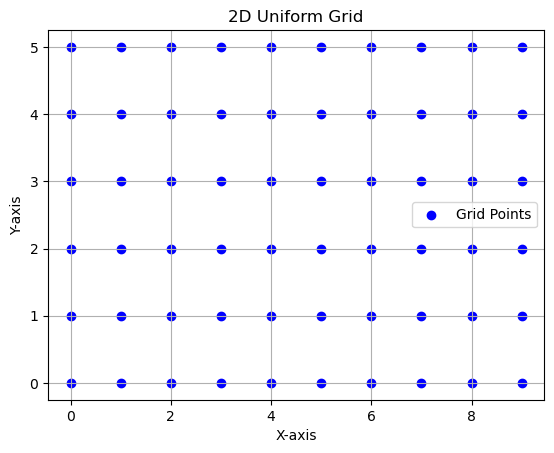

In [14]:
def lex(n_values):
    result = n_values[0]
    for i in range(1, len(n_values)):
        result += n_values[i] * prod(n_values[:i])

    return result

def prod(values):
    result = 1
    for val in values:
        result *= val
    return result

def grid_points_2d(N_values):
    d = 2
    grid_size = prod(N_values)
    points = []

    for i in range(grid_size):
        n_values = []

        # Tính toán tọa độ có cấu trúc của điểm mẫu
        for j in range(d):
            n_values.append(i // prod(N_values[:j]) % N_values[j])

        points.append(tuple(n_values))  # Chuyển danh sách tọa độ thành tuple và thêm vào danh sách điểm

    return points

# Ví dụ: Lưới đồng đều 2D
N_values_2d = [10, 6]  # Số điểm mẫu trên mỗi trục

# Lấy danh sách các điểm mẫu trên lưới
grid_points_2d = grid_points_2d(N_values_2d)


x_values = [point[0] for point in grid_points_2d]
y_values = [point[1] for point in grid_points_2d]

plt.scatter(x_values, y_values, marker='o', color='blue', label='Grid Points')
plt.grid(True)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Uniform Grid')
plt.legend()
plt.show()


In [15]:
def lex(n, N):
    result = n[0]
    for k in range(len(n)):
        term = n[k]
        for l in range(0, k-2):
            term *= N[l]
        result += term
    return result

### Hàm chuyển đổi chỉ số ô sang tọa độ đỉnh của ô

In [16]:
def get_cell(c, v): #c: danh sách chứa số lượng điểm mẫu trên mỗi chiều, v: chỉ số của ô trong lưới
    d = len(c) #số chiều của lưới
    C = [0] * d

    # Tính toán tọa độ ô C[0],...,C[d-1]
    P = 1
    for j in range(d-1, 0, -1):
        C[j] = v // P
        v -= C[j] * P
        P *= c[j-1]
    C[0] = v

    print("Tọa độ ô:", C)

    # Chuyển từ tọa độ ô sang tọa độ đỉnh
    result_vertex = []

    i = [0] * d
    for i[0] in range(2):
        # chuyển tọa độ đỉnh 
        for i[d-1] in range(2):
            vertex = lex([C[dim] + i[dim] for dim in range(d)],c)
            result_vertex.append(vertex)

    return result_vertex



# Ví dụ sử dụng cho lưới 2D có kích thước 3x4
c_2d = [3, 4]
v_index_2d = 7  # Chỉ số của ô
result_vertex_2d = get_cell(c_2d, v_index_2d)
print("Tọa độ Đỉnh Kết Quả:", result_vertex_2d)


Tọa độ ô: [0, 7]
Tọa độ Đỉnh Kết Quả: [7, 8, 9, 10]


### IMPLEMENTATION (2D - QUAD CELL)

### Định nghĩa 1 lớp UniformGrid 

In [17]:
class UniformGrid:
    def __init__(self, N1, N2, m1, m2, M1, M2):
        self.N1 = N1
        self.N2 = N2
        self.m1 = m1
        self.m2 = m2
        self.d1 = (M1 - m1) / (N1 - 1)
        self.d2 = (M2 - m2) / (N2 - 1)

    def numPoints(self):
        return self.N1 * self.N2

    def numCells(self):
        return (self.N1 - 1) * (self.N2 - 1)

    def getPoint(self, i, p):
        p[0] = self.m1 + (i%self.N1)*self.d1
        p[1] = self.m2 + (i/self.N1)*self.d2

    def getCell(self, i, v):
        cell_row = int(i / self.N1)
        cell_col = int(i % self.N1)
        v[0] = i + cell_row
        v[1] = v[0] + 1
        v[2] = v[1] + self.N1+1
        v[3] = v[0] + self.N1+1

        return v

    def getDimension1(self):
        return self.N1

    def getDimension2(self):
        return self.N2
    
    def findCell(self, p):
        C = [0, 0]
        C[0] = int((p[0] - self.m1) * self.N1 / self.d1)
        C[1] = int((p[1] - self.m2) * self.N2 / self.d2)
        
        if C[0] < 0 or C[0] >= self.N1 - 1 or C[1] < 0 or C[1] >= self.N2 - 1:
            return -1
        
        return C[0] + C[1] * self.N1



## Attribute Data Implementation

### Scalar attribute

In [18]:
import numpy as np

class UniformGrid:
    def __init__(self, width, height, num_cells_x, num_cells_y):
        self.width = width
        self.height = height
        self.num_cells_x = num_cells_x
        self.num_cells_y = num_cells_y
        self.c0_scalars = np.zeros((num_cells_x, num_cells_y))

    def getC0Scalar(self, c_x: int, c_y: int) -> float:
        return self.c0_scalars[c_x, c_y]

    def getC0ScalarInterpolation(self, x: float, y: float) -> float:
        cell_size_x = self.width / self.num_cells_x
        cell_size_y = self.height / self.num_cells_y

        c_x = min(int(x / cell_size_x), self.num_cells_x - 1)
        c_y = min(int(y / cell_size_y), self.num_cells_y - 1)

        return self.getC0Scalar(c_x, c_y)

    def getC1ScalarInterpolation(self, x: float, y: float) -> float: #nội suy tuyến tính
        cell_size_x = self.width / self.num_cells_x
        cell_size_y = self.height / self.num_cells_y

        c_x = int(x / cell_size_x)
        c_y = int(y / cell_size_y)

        x_ratio = (x - c_x * cell_size_x) / cell_size_x
        y_ratio = (y - c_y * cell_size_y) / cell_size_y

        scalar_top_left = self.getC0Scalar(c_x, c_y)
        scalar_top_right = self.getC0Scalar(c_x + 1, c_y)
        scalar_bottom_left = self.getC0Scalar(c_x, c_y + 1)
        scalar_bottom_right = self.getC0Scalar(c_x + 1, c_y + 1)

        top = scalar_top_left * (1 - x_ratio) + scalar_top_right * x_ratio
        bottom = scalar_bottom_left * (1 - x_ratio) + scalar_bottom_right * x_ratio

        return top * (1 - y_ratio) + bottom * y_ratio

grid = UniformGrid(width=10, height=10, num_cells_x=5, num_cells_y=5)
grid.c0_scalars = np.array([
    [1.0, 2.0, 3.0, 4.0, 5.0],
    [1.5, 2.5, 3.5, 4.5, 5.5],
    [2.0, 3.0, 4.0, 5.0, 6.0],
    [2.5, 3.5, 4.5, 5.5, 6.5],
    [3.0, 4.0, 5.0, 6.0, 7.0]
])

scalar_value = grid.getC0ScalarInterpolation(2.5, 3.5)
print(f"Scalar value at location (2.5, 3.5) using piecewise constant interpolation: {scalar_value}")

interpolation_scalar = grid.getC1ScalarInterpolation(2.5, 3.5)
print(f"Interpolated scalar at location (2.5, 3.5) using piecewise linear interpolation: {interpolation_scalar}")


Scalar value at location (2.5, 3.5) using piecewise constant interpolation: 2.5
Interpolated scalar at location (2.5, 3.5) using piecewise linear interpolation: 3.375


### Vector attribute

In [19]:
class UniformGrid:
    def __init__(self, width, height, num_cells_x, num_cells_y):
        self.width = width
        self.height = height
        self.num_cells_x = num_cells_x
        self.num_cells_y = num_cells_y
        self.c0_vectors = []
        self.c1_vectors = []

    def getCell(self, c, cell):
        cell.append(c)
        return len(cell)

    def world2cell(self, c, p, q):
        q[0] = p[0]
        q[1] = p[1]
    def Phi(self, i, x, y):
        return 1 - x if i == 0 else x

    def getC0Vector(self, c):
        return self.c0_vectors[2 * c: 2 * c + 2]

    def getC0VectorInterpolation(self, c, x, y):
        return self.getC0Vector(c)

    def getC1Vector(self, v):
        return self.c1_vectors[2 * v: 2 * v + 2]

    def getC1VectorInterpolation(self, c, p):
        cell = []
        C = self.getCell(c, cell)
        q = [0, 0]
        self.world2cell(c, p, q)
        v = [0, 0]
        for i in range(C):
            vi = self.getC1Vector(cell[i])
            if len(vi) >= 2:  # Check if vi has enough elements
                v[0] += vi[0] * self.Phi(i, q[0], q[1])
                v[1] += vi[1] * self.Phi(i, q[0], q[1])
        return v

# Tạo một lưới uniform 10x10 với 5 ô trên mỗi chiều
grid = UniformGrid(width=10, height=10, num_cells_x=5, num_cells_y=5)

grid.c0_vectors = [
    1.0, 2.0,    # Cell 0, vector (1.0, 2.0)
    3.0, 4.0,    # Cell 1, vector (3.0, 4.0)
    5.0, 6.0,    # Cell 2, vector (5.0, 6.0)
    7.0, 8.0     # Cell 3, vector (7.0, 8.0)
]

grid.c1_vectors = [
    1.0, 2.0,    # Vertex 0, vector (1.0, 2.0)
    3.0, 4.0,    # Vertex 1, vector (3.0, 4.0)
    5.0, 6.0,    # Vertex 2, vector (5.0, 6.0)
    7.0, 8.0,    # Vertex 3, vector (7.0, 8.0)
    9.0, 10.0,   # Vertex 4, vector (9.0, 10.0)
    11.0, 12.0   # Vertex 5, vector (11.0, 12.0)
]

# Sử dụng phép nội suy để lấy giá trị vector thuộc tính
c_vector = grid.getC0Vector(c=1)
print(f"Vector attribute at index 'c': {c_vector}")

interpolated_c_vector = grid.getC0VectorInterpolation(c=2, x=3.5, y=2.5)
print(f"Interpolated vector at location (3.5, 2.5) using nearest-neighbor interpolation: {interpolated_c_vector}")

v_vector = grid.getC1Vector(v=2)
print(f"Vector attribute at index 'v': {v_vector}")

interpolated_v_vector = grid.getC1VectorInterpolation(c=1, p=[3.5, 2.5])
print(f"Interpolated vector at location (3.5, 2.5) using linear interpolation: {interpolated_v_vector}")


Vector attribute at index 'c': [3.0, 4.0]
Interpolated vector at location (3.5, 2.5) using nearest-neighbor interpolation: [5.0, 6.0]
Vector attribute at index 'v': [5.0, 6.0]
Interpolated vector at location (3.5, 2.5) using linear interpolation: [-7.5, -10.0]


### Storing several attribute instances.

In [20]:
class Dataset:
    def __init__(self):
        self.attribute_dict = {}

    def add_attribute(self, name):
        if name not in self.attribute_dict:
            self.attribute_dict[name] = []

    def set_attribute_data(self, name, data):
        if name in self.attribute_dict:
            self.attribute_dict[name] = data
        else:
            print(f"Attribute '{name}' does not exist.")

    def get_attribute_data(self, name):
        return self.attribute_dict.get(name, None)

my_dataset = Dataset()
my_dataset.add_attribute("temperature")
my_dataset.add_attribute("pressure")
my_dataset.set_attribute_data("temperature", [25.5, 26.0, 24.8, 25.2])
my_dataset.set_attribute_data("pressure", [1013.25, 1012.8, 1014.2, 1013.0])

# Access data for attributes
temperature_data = my_dataset.get_attribute_data("temperature")
pressure_data = my_dataset.get_attribute_data("pressure")

# Display data
print("Temperature Data:", temperature_data)
print("Pressure Data:", pressure_data)



Temperature Data: [25.5, 26.0, 24.8, 25.2]
Pressure Data: [1013.25, 1012.8, 1014.2, 1013.0]
